# Case Study - Wine Quality Prediction

# Dataset:
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality 

# Problem Statement:
    
Wine Quality Prediction- Here, we will apply a method of assessing wine quality using a decision tree, and test it against the 
wine-quality dataset from the UC Irvine Machine Learning Repository.
The wine dataset is a classic and very easy multi-class classification dataset.

# Import all necessary modules and load the data

In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix


In [34]:
df = pd.read_csv('US_Heart_Patients.csv')

# Print 10 samples from the dataset

In [35]:
df.head(10)

,age,education,cigsPerDay,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,39.0,4.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46.0,2.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48.0,1.0,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61.0,3.0,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46.0,3.0,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,43.0,2.0,0.0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,63.0,1.0,0.0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,45.0,2.0,20.0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,52.0,1.0,0.0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,43.0,1.0,30.0,225.0,162.0,107.0,23.61,93.0,88.0,0


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number 
of attributes, types of attributes and a general idea of likely challenges in the dataset.

In [36]:
df.isnull().sum()

age                  2
education          110
cigsPerDay          31
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
df.isnull().sum()

age                0
education          0
cigsPerDay         0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
dtype: int64

# Print the datatypes of each column and the shape of the dataset

In [40]:
df.dtypes

age                float64
education          float64
cigsPerDay         float64
tot cholesterol    float64
Systolic BP        float64
Diastolic BP       float64
BMI                float64
heartRate          float64
glucose            float64
Heart-Att            int64
dtype: object

In [41]:
df.shape

(3682, 10)

# Print the descriptive statistics of each & every column using describe() function

In [42]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,3682.0,49.592613,8.582738,32.00,42.00,49.000,56.000,70.0
education,3682.0,1.980445,1.024634,1.00,1.00,2.000,3.000,4.0
cigsPerDay,3682.0,9.020641,11.932328,0.00,0.00,0.000,20.000,70.0
tot cholesterol,3682.0,236.881043,44.261399,113.00,206.00,234.000,263.000,600.0
Systolic BP,3682.0,132.487778,22.168086,83.50,117.00,128.000,144.000,295.0
Diastolic BP,3682.0,82.943509,12.010390,48.00,75.00,82.000,90.000,142.5
BMI,3682.0,25.779359,4.066247,15.54,23.07,25.375,28.015,56.8
heartRate,3682.0,75.695817,11.911579,44.00,68.00,75.000,82.000,143.0
glucose,3682.0,81.848995,23.845332,40.00,71.00,78.000,87.000,394.0
Heart-Att,3682.0,0.152634,0.359684,0.00,0.00,0.000,0.000,1.0


In [43]:
X = df.drop('Heart-Att',axis=1)
Y = df['Heart-Att']

In [45]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=.30,
                                                   stratify = Y,
                                                   random_state=1)
X_train.shape,X_test.shape

((2577, 9), (1105, 9))

In [46]:
print(y_train.value_counts(1))
print(y_test.value_counts(1))

0    0.847497
1    0.152503
Name: Heart-Att, dtype: float64
0    0.847059
1    0.152941
Name: Heart-Att, dtype: float64


### Apply the Random forest model and print the accuracy of Random forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier()

In [48]:
param_RF = {'criterion':['gini','entropy']}


## The following are just sample values and please do feel free to tweak and change them.

# 'max_depth': [7,10],
#     'max_features': [4,6],
#     'min_samples_leaf': [50,100],
#     'min_samples_split': [150,300],
#     'n_estimators': [301,701]

In [49]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut

RF_tune = GridSearchCV(estimator=rfcl,param_grid=param_RF,scoring='f1',n_jobs=-1,cv=LeaveOneOut())

In [50]:
RF_tune.fit(X_train,y_train)

GridSearchCV(cv=LeaveOneOut(), estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy']}, scoring='f1')

In [51]:
print(RF_tune.best_estimator_.score(X_train,y_train))
print(RF_tune.best_estimator_.score(X_test,y_test))

1.0
0.8407239819004525


In [52]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Random Forest'], 'Accuracy': RF_tune.best_estimator_.score(X_test,y_test)})
resultsDf = resultsDf[['Method', 'Accuracy']]
resultsDf

,Method,Accuracy
0,Random Forest,0.840724


## Applying PCA for reducing the dimensions

In [54]:
from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()

,age,education,cigsPerDay,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose
0,-1.234344,1.971268,-0.756086,-0.946349,-1.195023,-1.077839,0.292851,0.361393,-0.203380
1,-0.418643,0.019087,-0.756086,0.296438,-0.518283,-0.161841,0.725741,1.620843,-0.245322
2,-0.185585,-0.957003,0.920261,0.183457,-0.225029,-0.245114,-0.108065,-0.058423,-0.496978
3,1.329289,0.995177,1.758434,-0.268465,0.790082,1.003975,0.688847,-0.898056,0.887129
4,-0.418643,0.995177,1.171713,1.087302,-0.112239,0.087977,-0.659016,0.781210,0.132161


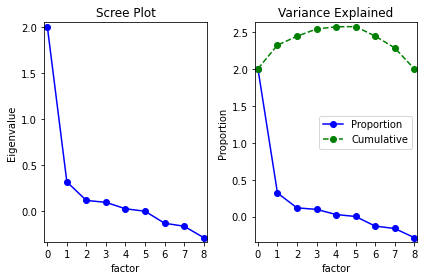

In [55]:
from statsmodels.multivariate.factor import Factor
model=Factor(X).fit()
model.plot_scree()
plt.show()

In [56]:
#9

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 9 to 7)

pca = PCA(n_components=9)
data_reduced = pca.fit_transform(X_scaled)
data_reduced.transpose()

array([[-1.97518108,  0.17281187, -0.36910709, ...,  0.26218833,
        -0.10349361, -1.21781063],
       [ 0.29947794,  0.51262868,  0.43746009, ..., -0.68602524,
         0.36172986,  2.29713356],
       [-0.79364887,  0.40492834,  0.33966437, ...,  1.03752157,
        -1.9053315 , -0.11337657],
       ...,
       [ 0.95501756,  1.14231507,  0.02698806, ..., -0.42072027,
        -0.47501388, -1.11188647],
       [-0.66901429, -0.29265374,  0.16764862, ...,  0.70270075,
         0.69662444,  0.11050341],
       [ 0.16908882, -0.15696126,  0.0183327 , ..., -0.14391409,
        -0.31347811,  0.00988187]])

In [59]:
pca.explained_variance_ratio_

array([0.27224959, 0.12961954, 0.11381593, 0.11172408, 0.10770141,
       0.09266932, 0.08607989, 0.06563472, 0.02050552])

In [63]:
np.sum(pca.explained_variance_ratio_)

1.0

In [64]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27224959, 0.40186913, 0.51568507, 0.62740914, 0.73511056,
       0.82777987, 0.91385976, 0.97949448, 1.        ])

In [65]:
#9

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 9 to 7)

pca = PCA(n_components=7)
data_reduced = pca.fit_transform(X_scaled)
data_reduced.transpose()

array([[-1.97518108,  0.17281187, -0.36910709, ...,  0.26218833,
        -0.10349361, -1.21781063],
       [ 0.29947794,  0.51262868,  0.43746009, ..., -0.68602524,
         0.36172986,  2.29713356],
       [-0.79364887,  0.40492834,  0.33966437, ...,  1.03752157,
        -1.9053315 , -0.11337657],
       ...,
       [ 1.58816392,  0.19843422, -1.12422871, ...,  0.37431269,
         1.38977298,  0.29129351],
       [-0.90459878, -1.55965943,  0.33370932, ..., -0.42460315,
        -0.14445821,  0.25048336],
       [ 0.95501756,  1.14231507,  0.02698806, ..., -0.42072027,
        -0.47501388, -1.11188647]])

In [68]:
data_reduced.shape

(3682, 7)

In [69]:
X.shape

(3682, 9)

## Random Forest with Reduced Dimensions

In [70]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train_PCA, X_test_PCA, y_train, y_test =train_test_split(data_reduced, Y, test_size=.30,
                                                   stratify = Y,
                                                   random_state=1)
X_train_PCA.shape,X_test_PCA.shape

((2577, 7), (1105, 7))

In [73]:
RF_tune.fit(X_train_PCA,y_train)

GridSearchCV(cv=LeaveOneOut(), estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy']}, scoring='f1')

In [74]:
print(RF_tune.best_estimator_.score(X_train_PCA,y_train))
print(RF_tune.best_estimator_.score(X_test_PCA,y_test))

1.0
0.848868778280543


In [75]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest_PCA'], 'Accuracy': [RF_tune.best_estimator_.score(X_test_PCA,y_test)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy']]
resultsDf
resultsDf

,Method,Accuracy
0,Random Forest,0.840724
0,Random Forest_PCA,0.848869
